# Data Features:

Age ==>> Age in years

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

Sibsp ==>> NO of siblings / spouses aboard the Titanic
The dataset defines family relations in this way...

a. Sibling = brother, sister, stepbrother, stepsister

b. Spouse = husband, wife (mistresses and fiancés were ignored)

Parch ==>> The dataset defines family relations in this way...

a. Parent = mother, father

b. Child = daughter, son, stepdaughter, stepson

c. Some children travelled only with a nanny, therefore parch=0 for them.

Pclass ==>> A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower
Embarked ==>> Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

Name ==>> Passenger Name

Sex ==>> Sex
Ticket ==>> Ticket number
Cabin ==>> Cabin number
Fare ==>> Indicating the fare paid
PassengerID ==>> Passenger ID
Survival ==>> Survival 0 = No, 1 = Yes

# Importing the Libraries

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#pd.set_option('display.max_rows',None)

# Loading of the data

In [3]:
data1=pd.read_csv('titanic.csv')
#data1=pd.DataFrame(data1)
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# checking the dimensionality

In [4]:
data1.shape

(891, 12)

##### Observation:

    Our dataset has 891 rows and 12 columns.

# Stats summary

In [5]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Observation:

    From the count, we see that 'Age' column has missing data.
    
    Mean value > Median = 'Fare', i.e. the data in 'Fare' is right skewed.

# Checking null values in the dataframe

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Observation:

        The 'Age','Cabin' and 'Embarked' column has null values, which will be handled during univariate analysis.

# Checking the datatypes of columns:

In [7]:
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Observation:

        There is a combination of datatypes present in the data : int, float and object.
        
        Categorical features : Survived,Sex, Embarked
        
        Ordinal features: Pclass
        
        Continuous features: Age, Fare
        
        Discrete features: SibSp, Parch
        
        The target variable in our dataset in 'Survived' and rest 11 features are independent features.

In [8]:
#check duplicate rows
dup_data1=data1[data1.duplicated()]
dup_data1.shape

(0, 12)

There are no duplicate rows present in the dataframe.

# Univariate Analysis of features

In [9]:
list_cols=data1.columns

In [10]:
list_cols[0]

'PassengerId'

### 1.'PassengerId' 

In [11]:
data1['PassengerId'].dtypes

dtype('int64')

In [12]:
data1['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

##### Observation:

        This feature has no impact on outcome variable, so it will be excluded from analysis.

In [13]:
list_cols[1]

'Survived'

### 2.'Survived'

It is our target variable.

In [14]:
data1['Survived'].dtype

dtype('int64')

In [15]:
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### Observation:

    62% of the people died because of the sinking of the Titanic and 38% of them survived.

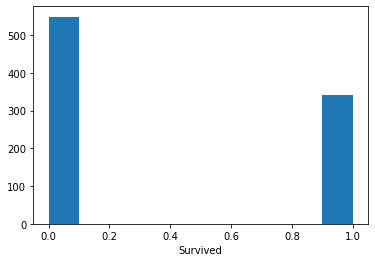

In [16]:
plt.hist(x=data1['Survived'])
plt.xlabel('Survived')
plt.show()

##### Observation:

    'Survived' column is our target variable and we see from the data distribution of target variable that the dataset is not imbalanced.

In [17]:
list_cols[2]

'Pclass'

### 3.'Pclass'

It is a categorical variable with 3 values: 1 Class, 2 Class, 3 Class

In [18]:
data1['Pclass'].dtype

dtype('int64')

In [19]:
data1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

##### Observation:

    We have 3 types of passenger class, i.e. 1 , 2 and 3.
    
    Majority of people travelled in 3rd class.

In [20]:
list_cols[3]

'Name'

### 4.'Name'

In [21]:
data1['Name'].dtype

dtype('O')

In [22]:
data1['Name'].value_counts()

Saad, Mr. Amin                           1
Asplund, Master. Clarence Gustaf Hugo    1
Panula, Master. Eino Viljami             1
Osen, Mr. Olaf Elon                      1
del Carlo, Mr. Sebastiano                1
                                        ..
Nicola-Yarred, Miss. Jamila              1
Doharr, Mr. Tannous                      1
Scanlan, Mr. James                       1
Fortune, Miss. Mabel Helen               1
Dean, Mr. Bertram Frank                  1
Name: Name, Length: 891, dtype: int64

##### Observation:

    The name values are as such of no use but we extract information from the same to generate any insights, if any.

In [23]:
list_cols[4]

'Sex'

### 5.'Sex'

'Sex' is a categorical feature with 2 categories: Male and Female

In [24]:
data1['Sex'].dtype

dtype('O')

In [25]:
data1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

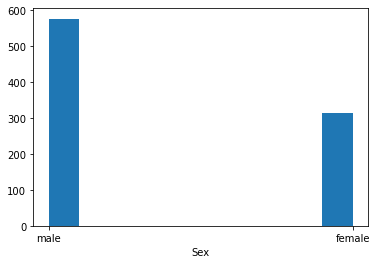

In [26]:
plt.hist(data1['Sex'])
plt.xlabel('Sex')
plt.show()

##### Observation:

    Titanic had more males than females as travellers.

In [27]:
list_cols[5]

'Age'

### 6.'Age'

Age is a numerical feature.

In [28]:
data1['Age'].dtype

dtype('float64')

In [29]:
print('The age of travellers ranges between ',data1['Age'].min()," and ",data1['Age'].max())

The age of travellers ranges between  0.42  and  80.0


In [30]:
list_cols[6]

'SibSp'

### 7.'SibSp'

This feature gives us the info of no. of siblings and spouses that travelled with a person.

In [31]:
data1['SibSp'].dtype

dtype('int64')

In [32]:
data1['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

##### Observation:

    Many of the passengers didnot have any sibling or spouse,i.e. most of the people were travelling alone.

In [33]:
list_cols[7]

'Parch'

### 8.'Parch'

In [34]:
data1['Parch'].dtype

dtype('int64')

In [35]:
data1['Parch'].isnull().sum()

0

In [36]:
data1['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

##### Observation:

    Many passengers were travelling alone as seen from the above info of parents and children.

In [37]:
list_cols[8]

'Ticket'

### 9.'Ticket'

Ticket no. is allocated to each person. Ticket is a mix of numeric and alphanumeric data types.

In [38]:
data1['Ticket'].dtype

dtype('O')

In [39]:
data1['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
28425       1
347073      1
349215      1
342826      1
244270      1
Name: Ticket, Length: 681, dtype: int64

##### Observation:

    We see that the ticket numbers data is duplicated in some cases.

In [40]:
list_cols[9]

'Fare'

### 10. 'Fare'

This is a numerical feature, the feature gives us the amount paid by each passenger.

In [41]:
print("The travle fare ranges between ",data1['Fare'].min()," and ",data1['Fare'].max())

The travle fare ranges between  0.0  and  512.3292


##### Observation:

    The travel fare ranges between 0.0 and 512.3292.

In [42]:
list_cols[10]

'Cabin'

### 11.'Cabin'

Cabin numbers are stored in this feature.

In [43]:
data1['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F33            3
              ..
E40            1
C82            1
D9             1
A10            1
B69            1
Name: Cabin, Length: 147, dtype: int64

##### Observation:

    Some cabin numbers are repeated in the dataset as same cabin can be occupied by multiple people.
    
    The cabin values are alphanumeric

In [44]:
list_cols[11]

'Embarked'

### 12.'Embarked'

 Embarked is a categorical variables with 3 categries: C(Cherbourg), Q(Queenstown) and S(Southampton)

In [45]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Observation:

    Majority of the passengers embarked from S(Southampton)

# EDA

### checking correlation between numerical features

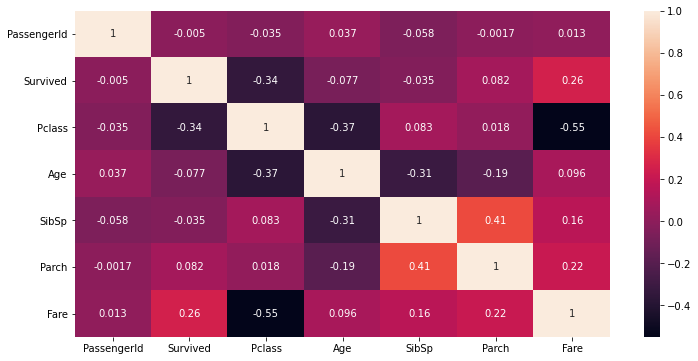

In [46]:
corr=data1.corr()
plt.figure(figsize=(12,6))
ax=sn.heatmap(corr,annot=True)
plt.show()

##### Observation:

        Only 'Fare' feature has some correlation with target feature 'Survived'

## Multi-variate Analysis with Target Feature

In [47]:
list_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 'Pclass' , 'Sex' & 'Survived'

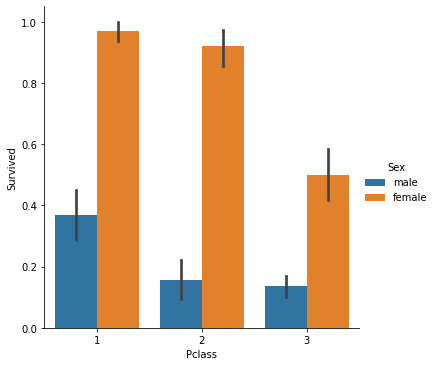

In [48]:
sn.catplot(x='Pclass',y='Survived',data=data1,kind='bar',hue='Sex')
plt.show()

##### Observation:

    The majority of survivers in any of the three classes are females.
    
    The proportion of survived people decreases as the Passenger Class decreases.

### 'Age', 'Sex' & 'Survived'

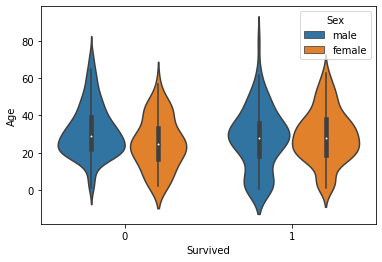

In [49]:
sn.violinplot(data1['Survived'],data1['Age'],hue=data1['Sex'])
plt.show()

##### Observation:

    Most of the male and female survivers were between age group 20 to 35.

### 'Age', 'Fare' & 'Survived'

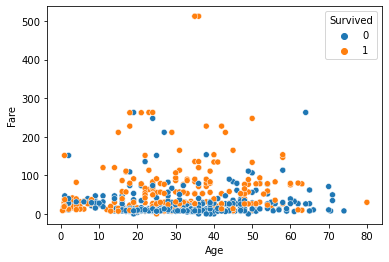

In [50]:
sn.scatterplot(x=data1['Age'],y=data1['Fare'],hue=data1['Survived'])
plt.show()

##### Observation:

    The travellers with high fare had high chances of survival. 

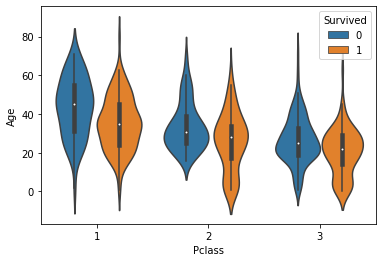

In [51]:
sn.violinplot(x=data1['Pclass'],y=data1['Age'],hue=data1['Survived'])
plt.show()

##### Observation:

        The travellers in 1st class were mostly senior adults and they were most of the survivers.

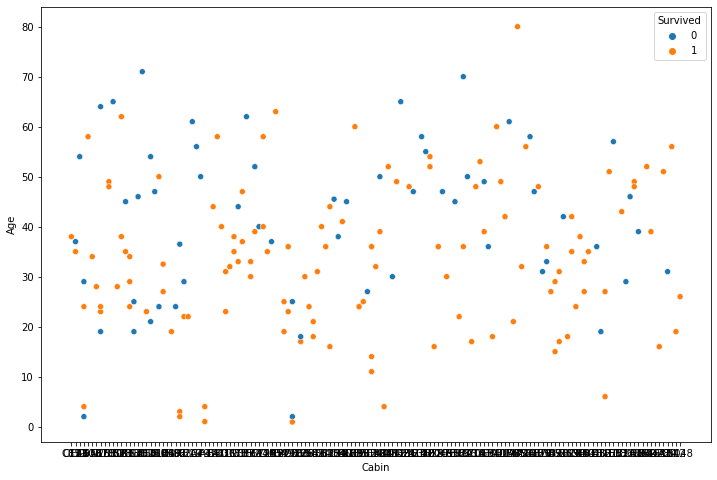

In [52]:
plt.figure(figsize=(12,8))
sn.scatterplot(x=data1['Cabin'],y=data1['Age'],hue=data1['Survived'])
plt.show()

##### Observation:

    There was no relation seen between class allocated onboard and age of people.

# Data Pre-Processing

### Extracting features from 'Name'

In [53]:
data1['Name'][0].split(',')[1].split('.')[0]

' Mr'

In [54]:
temp_title1=[]
temp_title1.clear()

for i in range(len(data1['Name'])):
    temp_title2=data1['Name'][i].split(',')[1].split('.')[0]
    temp_title1.append(temp_title2)
temp_title1

[' Mr',
 ' Mrs',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Don',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Master',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Master',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mr'

In [55]:
data1['Name'].shape

(891,)

In [56]:
len(temp_title1)

891

##### Observation

    We can extract the titles and analyse if there is any trend between title of person and survival rate.

In [57]:
data1.shape

(891, 12)

In [58]:
data1['Titles']=temp_title1

In [59]:
data1.shape

(891, 13)

In [60]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [61]:
data1['Titles'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Sir               1
 Lady              1
 Mme               1
 Ms                1
 Capt              1
 Jonkheer          1
 Don               1
 the Countess      1
Name: Titles, dtype: int64

In [62]:
pd.crosstab(columns=data1['Survived'],index=data1['Titles'])

Survived,0,1
Titles,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


##### Observation:

    The %ge of survival was very less with 'Master' titles as well as 'Mr'.

# Handling of missing values

In [63]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Titles           0
dtype: int64

In [64]:
len(data1['Cabin'])

891

In [65]:
687/891*100

77.10437710437711

##### Observation:

    77% of the values of 'Cabin' are null, so we can drop this column.

In [66]:
data1.drop('Cabin',axis=1,inplace=True)

In [67]:
data1.shape

(891, 12)

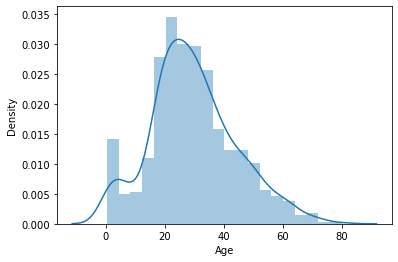

In [68]:
sn.distplot(data1['Age'])
plt.show()

In [69]:
data1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Observation:

    The mean of 'Age' column is higher than median, so the data is right skewed.
    
    We will replace the missing values with median of that column.

In [70]:
data1['Age'].fillna(data1['Age'].median(),inplace=True)

In [71]:
data1['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

##### Observation:

    After replacing the null values with median of 'Age' column, the mean and median is undisturbed.

In [72]:
# As we have extracted necessary feature from 'Name', we will drop it
data1.drop('Name',axis=1,inplace=True)

In [73]:
data1.shape

(891, 11)

In [74]:
data1['Embarked'].isnull().sum()

2

In [75]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Observation:

    As the most frequent Embarked station is Southampton, we will replace the 2 missing values with 'S'

In [76]:
data1['Embarked'].fillna('S',inplace=True)

In [77]:
data1['Embarked'].isnull().sum()

0

# Checking for outliers

In [78]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Titles       891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


##### Observation:

     We will check for any outliers for our numerical features.

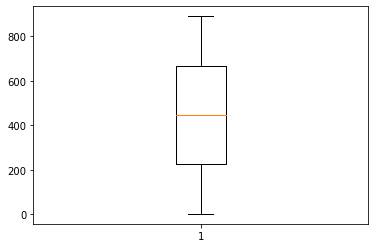

In [79]:
plt.boxplot(data1['PassengerId'])
plt.show()

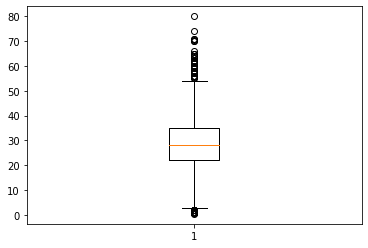

In [80]:
plt.boxplot(data1['Age'])
plt.show()

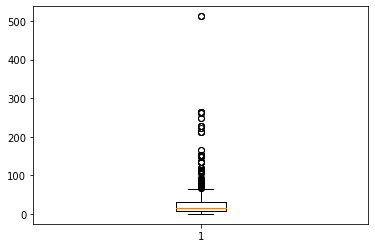

In [81]:
plt.boxplot(data1['Fare'])
plt.show()

##### Observation:

    The data points away from whiskers in 'Age' column are very close to whisker so we will not consider them outliers.
    
    In case of 'Fare', we see few outliers , we will remove it.

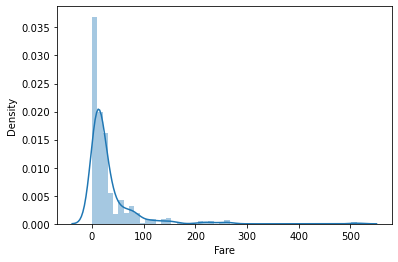

In [82]:
sn.distplot(data1['Fare'])
plt.show()

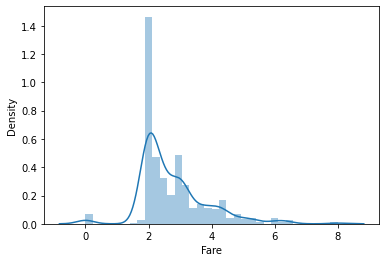

In [83]:
sn.distplot(np.cbrt(data1['Fare']))
plt.show()

##### Observation:

    To remove skewness and control the effect of outlier, we will use cuberoot transform on 'Fare'

In [84]:
data1['Fare']=np.cbrt(data1['Fare'])

### Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Sex']=le.fit_transform(data1['Sex'])

In [86]:
data1['Survived']=le.fit_transform(data1['Survived'])

In [87]:
data1['Ticket']=le.fit_transform(data1['Ticket'])

In [88]:
data1['Embarked']=le.fit_transform(data1['Embarked'])

In [89]:
data1['Titles']=le.fit_transform(data1['Titles'])

In [90]:
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
0,1,0,3,1,22.0,1,0,523,1.935438,2,11
1,2,1,1,0,38.0,1,0,596,4.146318,0,12
2,3,1,3,0,26.0,0,0,669,1.993730,2,8
3,4,1,1,0,35.0,1,0,49,3.758647,2,12
4,5,0,3,1,35.0,0,0,472,2.004158,2,11


### Scaling

# Splitting the dataset into training and testing

In [91]:
data1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
0,1,0,3,1,22.0,1,0,523,1.935438,2,11
1,2,1,1,0,38.0,1,0,596,4.146318,0,12
2,3,1,3,0,26.0,0,0,669,1.993730,2,8
3,4,1,1,0,35.0,1,0,49,3.758647,2,12
4,5,0,3,1,35.0,0,0,472,2.004158,2,11
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,101,2.351335,2,14
887,888,1,1,0,19.0,0,0,14,3.107233,2,8
888,889,0,3,0,28.0,1,2,675,2.862294,2,8
889,890,1,1,1,26.0,0,0,8,3.107233,0,11


In [92]:
x=data1.drop('Survived',axis=1)
y=data1['Survived']

In [93]:
print(x.shape)
print(y.shape)

(891, 10)
(891,)


# Finding the best random state

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ",maxAccu," at random state ",maxRs)

Best Accuracy is  0.8542372881355932  at random state  196


# Model Building

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=196)

In [96]:
#scaling the data
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report

In [98]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

pred_lr = lr.predict(x_test)

print('Accuracy_score:',accuracy_score(y_test,pred_lr))

Accuracy_score: 0.8338983050847457


In [99]:
# cross validation
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(lr, x_train, y_train, cv=10)
print(score_cv)

print('\n The mean score we got from 10-Fold CV:',np.mean(score_cv))

[0.61666667 0.76666667 0.78333333 0.75       0.78333333 0.81666667
 0.84745763 0.84745763 0.83050847 0.6779661 ]

 The mean score we got from 10-Fold CV: 0.7720056497175142


In [100]:
#Classification Report

print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       182
           1       0.80      0.75      0.78       113

    accuracy                           0.83       295
   macro avg       0.83      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295



# AUC Score

In [101]:
y_test_prob = lr.predict_proba(x_test)[:,1]

print('AUC:',roc_auc_score(y_test,y_test_prob))

AUC: 0.8997860546533113


# AUC Curve

In [102]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob) #thresholds here are the cutoffs

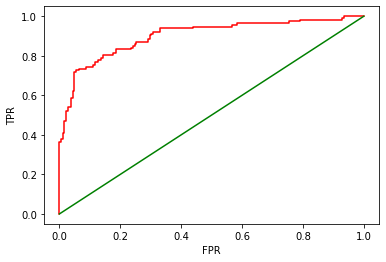

In [103]:
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()